### Importing Libraries

In [241]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Load Data

In [242]:
data = pd.read_csv('data.csv')
data.head()

,_id,isPb,wpm,acc,rawWpm,consistency,charStats,mode,mode2,quoteLength,...,punctuation,numbers,language,funbox,difficulty,lazyMode,blindMode,bailedOut,tags,timestamp
0,676bf3b498949642937b6279,NaN,99.62,100.0,99.62,70.46,52;0;0;0,words,10,-1,...,False,False,english,none,master,False,False,False,NaN,1735127988000
1,676bf24898949642937b5679,NaN,106.81,100.0,106.81,85.66,51;0;0;0,words,10,-1,...,False,False,english,none,master,False,False,False,NaN,1735127624000
2,676bf21b98949642937b54ff,NaN,102.95,100.0,102.95,81.04,57;0;0;0,words,10,-1,...,False,False,english,none,master,False,False,False,NaN,1735127579000
3,676bf0f698949642937b4b0c,NaN,96.65,100.0,96.65,89.70,46;0;0;0,words,10,-1,...,False,False,english,none,master,False,False,False,NaN,1735127286000
4,676bf0b998949642937b48d2,NaN,102.25,100.0,102.25,93.96,51;0;0;0,words,10,-1,...,False,False,english,none,master,False,False,False,NaN,1735127225000


### Data cleaning

In [243]:
data = data.drop(['_id', 'isPb','quoteLength', 'punctuation', 'numbers', 'language', 'funbox', 'lazyMode', 'blindMode', 'bailedOut', 'tags','restartCount','afkDuration'], axis=1)
data.head()

,wpm,acc,rawWpm,consistency,charStats,mode,mode2,testDuration,incompleteTestSeconds,difficulty,timestamp
0,99.62,100.0,99.62,70.46,52;0;0;0,words,10,6.26,18.34,master,1735127988000
1,106.81,100.0,106.81,85.66,51;0;0;0,words,10,5.73,5.07,master,1735127624000
2,102.95,100.0,102.95,81.04,57;0;0;0,words,10,6.64,11.69,master,1735127579000
3,96.65,100.0,96.65,89.70,46;0;0;0,words,10,5.71,21.16,master,1735127286000
4,102.25,100.0,102.25,93.96,51;0;0;0,words,10,5.99,63.44,master,1735127225000


In [244]:
df = pd.DataFrame(data)
df['charStats'] = df['charStats'].apply(lambda x: x.split(';')[0])
df.head()

,wpm,acc,rawWpm,consistency,charStats,mode,mode2,testDuration,incompleteTestSeconds,difficulty,timestamp
0,99.62,100.0,99.62,70.46,52,words,10,6.26,18.34,master,1735127988000
1,106.81,100.0,106.81,85.66,51,words,10,5.73,5.07,master,1735127624000
2,102.95,100.0,102.95,81.04,57,words,10,6.64,11.69,master,1735127579000
3,96.65,100.0,96.65,89.70,46,words,10,5.71,21.16,master,1735127286000
4,102.25,100.0,102.25,93.96,51,words,10,5.99,63.44,master,1735127225000


### Convert timestamp into date and time

In [245]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
df['date'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.to_period('M')
df['year'] = df['datetime'].dt.year
df.drop(columns=['timestamp'], inplace=True)
df.head()

,wpm,acc,rawWpm,consistency,charStats,mode,mode2,testDuration,incompleteTestSeconds,difficulty,datetime,date,month,year
0,99.62,100.0,99.62,70.46,52,words,10,6.26,18.34,master,2024-12-25 11:59:48,2024-12-25,2024-12,2024
1,106.81,100.0,106.81,85.66,51,words,10,5.73,5.07,master,2024-12-25 11:53:44,2024-12-25,2024-12,2024
2,102.95,100.0,102.95,81.04,57,words,10,6.64,11.69,master,2024-12-25 11:52:59,2024-12-25,2024-12,2024
3,96.65,100.0,96.65,89.70,46,words,10,5.71,21.16,master,2024-12-25 11:48:06,2024-12-25,2024-12,2024
4,102.25,100.0,102.25,93.96,51,words,10,5.99,63.44,master,2024-12-25 11:47:05,2024-12-25,2024-12,2024


In [246]:
filtered_data = df[df['mode2'] == 10]
filtered_data = filtered_data.groupby('date').filter(lambda x: len(x) >= 3)

data= filtered_data.copy(deep=True)
data.count()

wpm                      926
acc                      926
rawWpm                   926
consistency              926
charStats                926
mode                     926
mode2                    926
testDuration             926
incompleteTestSeconds    926
difficulty               926
datetime                 926
date                     926
month                    926
year                     926
dtype: int64

$$ WPM - Words\ Per\ Minute $$

### Increase in WPM per Day, Month , Year

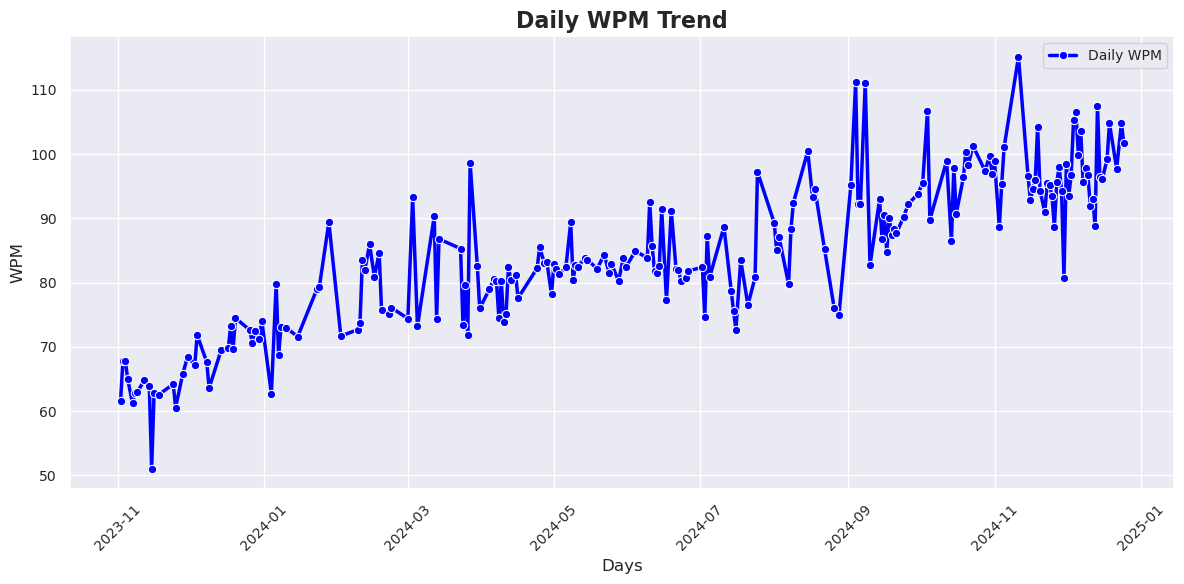

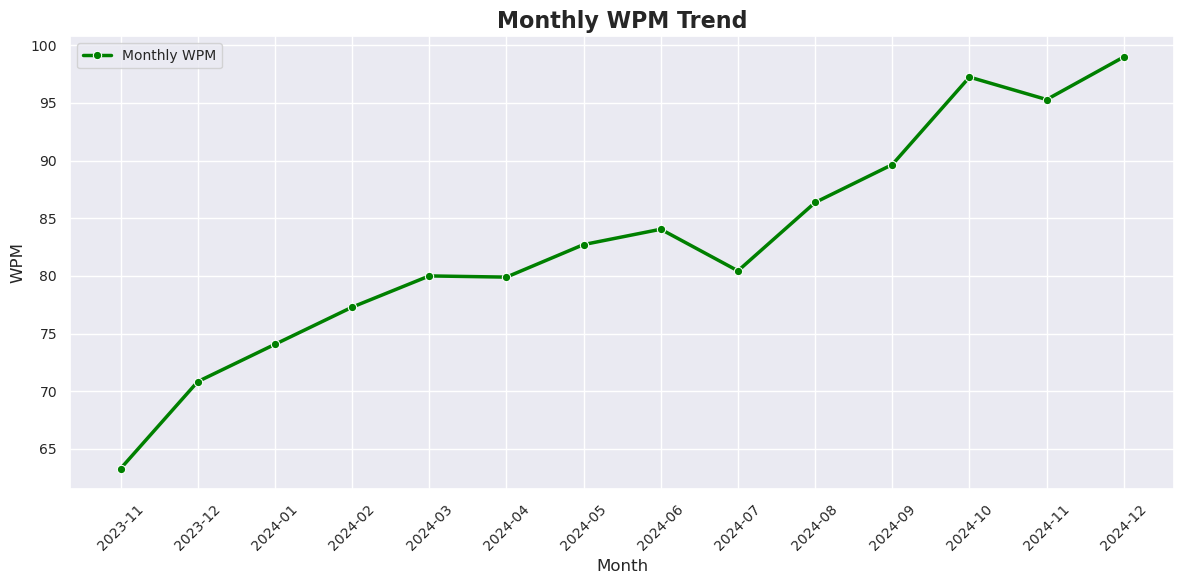

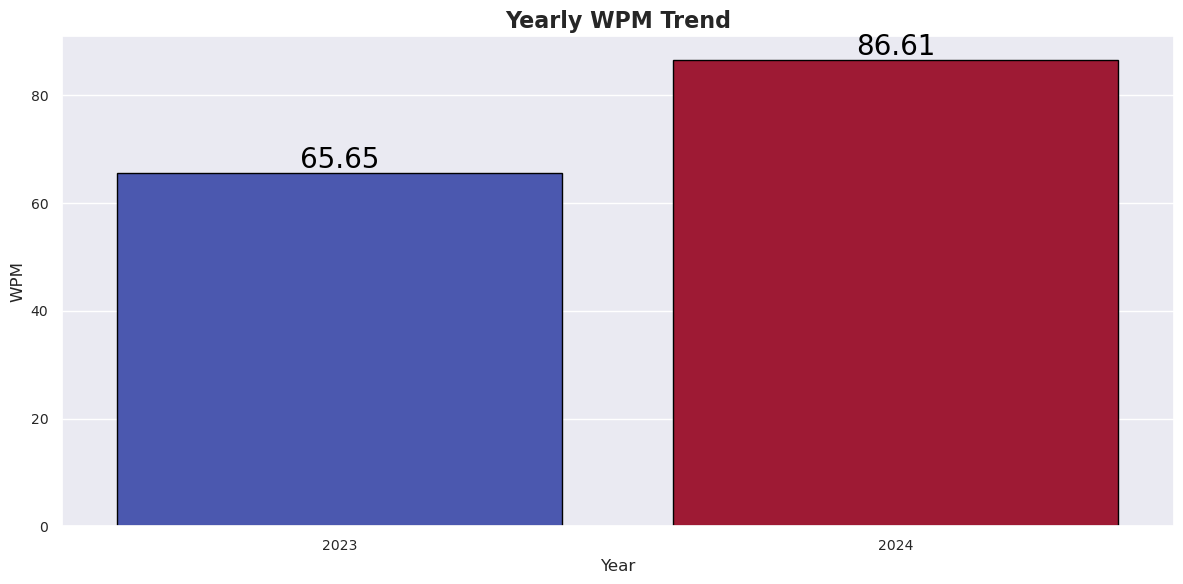

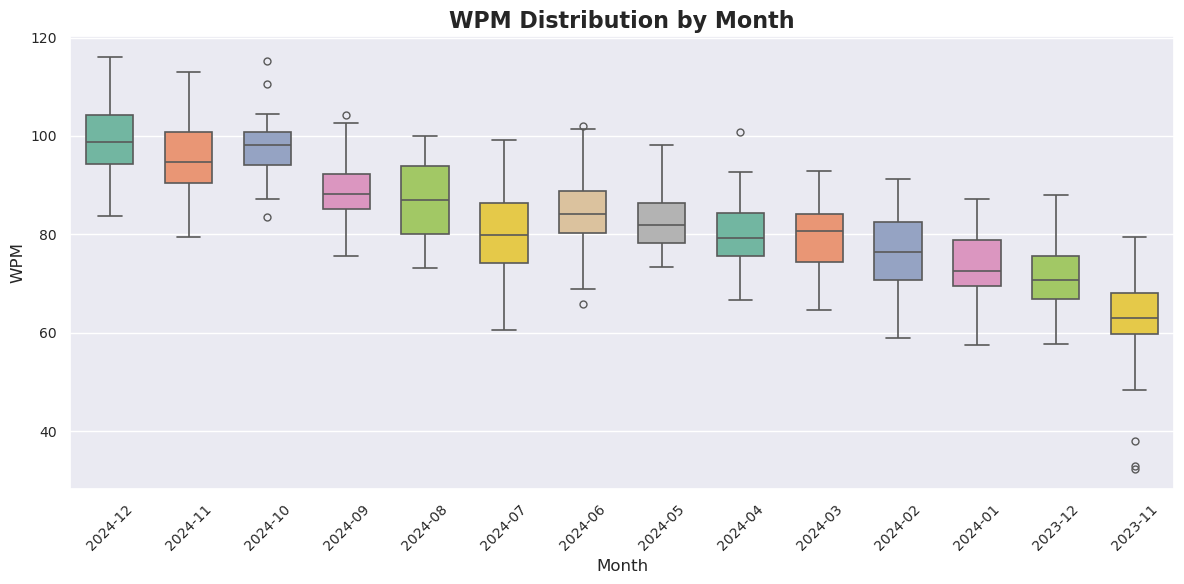

In [247]:
daily_wpm = df.groupby('date')['wpm'].mean()
monthly_wpm = df.groupby('month')['wpm'].mean()
yearly_wpm = df.groupby('year')['wpm'].mean()

sns.set_theme(style="darkgrid")

# Daily WPM trend
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=daily_wpm.index,
    y=daily_wpm.values,
    marker='o',
    linewidth=2.5,
    label="Daily WPM",
    color="blue",
)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Daily WPM Trend", fontsize=16, fontweight="bold")
plt.xlabel("Days", fontsize=12)
plt.ylabel("WPM", fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Monthly WPM trend
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=monthly_wpm.index.astype(str),
    y=monthly_wpm.values,
    marker='o',
    linewidth=2.5,
    label="Monthly WPM",
    color="green",
)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Monthly WPM Trend", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("WPM", fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Yearly WPM trend
plt.figure(figsize=(12, 6))

# Create the barplot
ax = sns.barplot(
    x=yearly_wpm.index,
    y=yearly_wpm.values,
    hue=yearly_wpm.index,  
    dodge=False,           
    palette="coolwarm", 
    edgecolor="black",
    legend=False        
)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=20, color='black', 
                xytext=(0, 9), textcoords='offset points')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title("Yearly WPM Trend", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("WPM", fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='month',
    y='wpm',
    hue='month',
    dodge=False,
    palette="Set2",
    width=0.6,
    fliersize=5,
    linewidth=1.2
)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("WPM Distribution by Month", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("WPM", fontsize=12)
plt.tight_layout()
plt.show()

### Increase of WPM per Minute, Hour

In [248]:
df['total_time'] = df['testDuration'] + df['incompleteTestSeconds']
df['cumulative_time'] = df['total_time'].cumsum()

minute_wpm = data.groupby(df['cumulative_time'] // 60)['wpm'].mean()  
hour_wpm = data.groupby(df['cumulative_time'] // 3600)['wpm'].mean()  
minute_wpm.index = minute_wpm.index.max() - minute_wpm.index
hour_wpm.index = hour_wpm.index.max() - hour_wpm.index
df.head()

,wpm,acc,rawWpm,consistency,charStats,mode,mode2,testDuration,incompleteTestSeconds,difficulty,datetime,date,month,year,total_time,cumulative_time
0,99.62,100.0,99.62,70.46,52,words,10,6.26,18.34,master,2024-12-25 11:59:48,2024-12-25,2024-12,2024,24.60,24.60
1,106.81,100.0,106.81,85.66,51,words,10,5.73,5.07,master,2024-12-25 11:53:44,2024-12-25,2024-12,2024,10.80,35.40
2,102.95,100.0,102.95,81.04,57,words,10,6.64,11.69,master,2024-12-25 11:52:59,2024-12-25,2024-12,2024,18.33,53.73
3,96.65,100.0,96.65,89.70,46,words,10,5.71,21.16,master,2024-12-25 11:48:06,2024-12-25,2024-12,2024,26.87,80.60
4,102.25,100.0,102.25,93.96,51,words,10,5.99,63.44,master,2024-12-25 11:47:05,2024-12-25,2024-12,2024,69.43,150.03


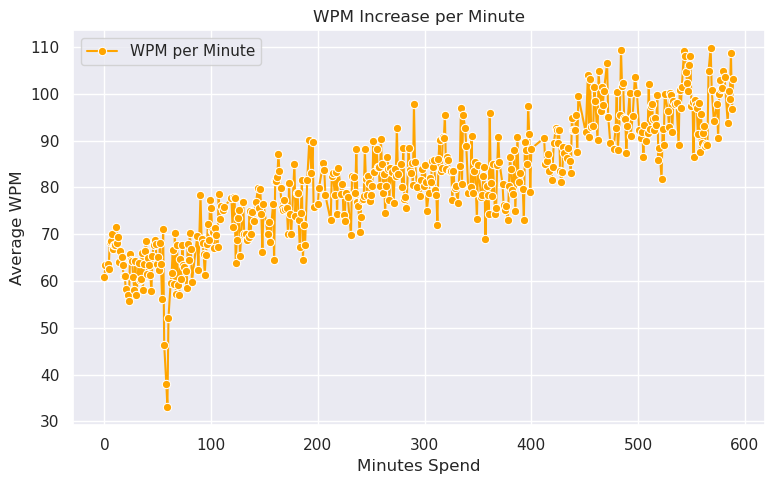

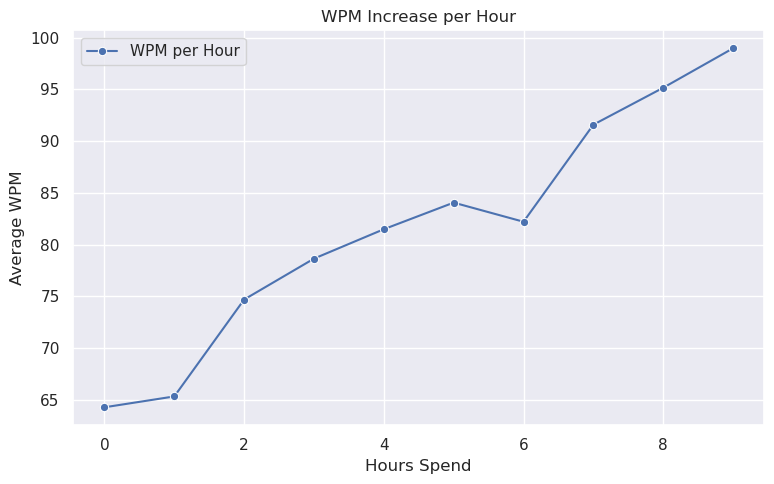

In [249]:
plt.figure(figsize=(15, 5))

# WPM per minute
plt.subplot(1, 2, 1)
sns.lineplot(x=minute_wpm.index, y=minute_wpm.values, marker='o', label="WPM per Minute",color='orange')
plt.title("WPM Increase per Minute")
plt.xlabel("Minutes Spend")
plt.ylabel("Average WPM")
plt.tight_layout()
plt.show()

# WPM per hour
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
sns.lineplot(x=hour_wpm.index, y=hour_wpm.values, marker='o', label="WPM per Hour")
plt.title("WPM Increase per Hour")
plt.xlabel("Hours Spend")
plt.ylabel("Average WPM")

plt.tight_layout()
plt.show()

### Accuracy Impact on WPM

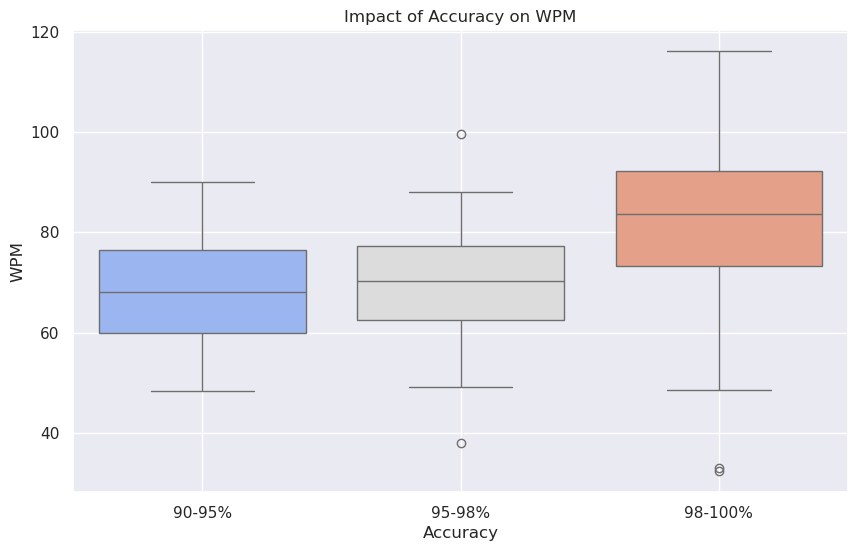

In [250]:
data['acc_group'] = pd.cut(data['acc'], bins=[90, 95, 98, 100], labels=['90-95%', '95-98%', '98-100%'])

sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='acc_group', y='wpm', hue='acc_group', dodge=False, palette='coolwarm', legend=False)
plt.title('Impact of Accuracy on WPM')
plt.xlabel('Accuracy')
plt.ylabel('WPM')
plt.grid(True)
plt.show()

### WPM Increase graph

In [251]:
data.head()

,wpm,acc,rawWpm,consistency,charStats,mode,mode2,testDuration,incompleteTestSeconds,difficulty,datetime,date,month,year,acc_group
0,99.62,100.0,99.62,70.46,52,words,10,6.26,18.34,master,2024-12-25 11:59:48,2024-12-25,2024-12,2024,98-100%
1,106.81,100.0,106.81,85.66,51,words,10,5.73,5.07,master,2024-12-25 11:53:44,2024-12-25,2024-12,2024,98-100%
2,102.95,100.0,102.95,81.04,57,words,10,6.64,11.69,master,2024-12-25 11:52:59,2024-12-25,2024-12,2024,98-100%
3,96.65,100.0,96.65,89.70,46,words,10,5.71,21.16,master,2024-12-25 11:48:06,2024-12-25,2024-12,2024,98-100%
4,102.25,100.0,102.25,93.96,51,words,10,5.99,63.44,master,2024-12-25 11:47:05,2024-12-25,2024-12,2024,98-100%


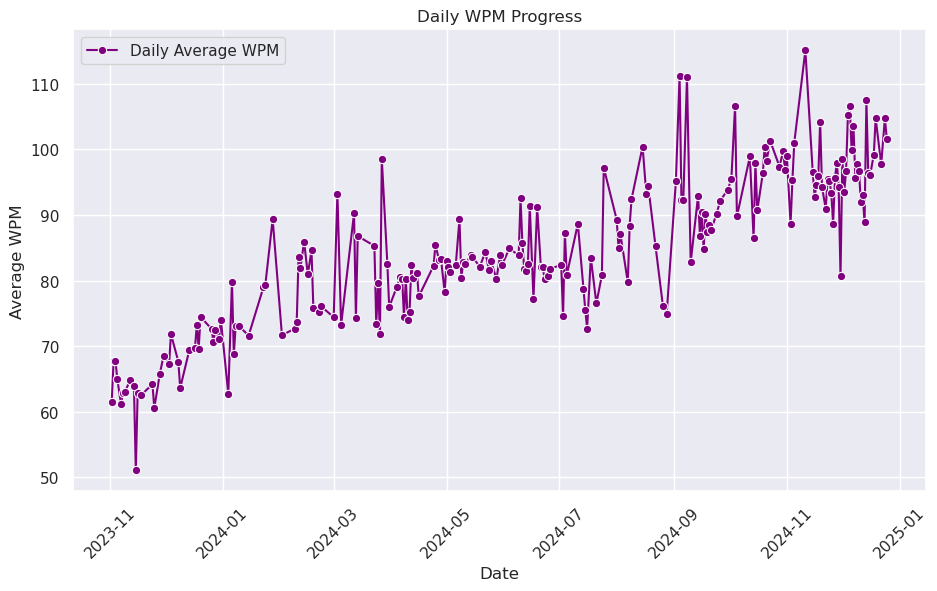

In [252]:
daily_wpm = df.groupby('date')['wpm'].mean().reset_index()

# Plot the daily WPM trend
plt.figure(figsize=(11, 6))
sns.lineplot(data=daily_wpm, x='date', y='wpm', marker='o', label='Daily Average WPM', color='purple')
plt.title('Daily WPM Progress')
plt.xlabel('Date')
plt.ylabel('Average WPM')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 5. Average Days required to beat my own highscore

In [253]:
data.tail()

,wpm,acc,rawWpm,consistency,charStats,mode,mode2,testDuration,incompleteTestSeconds,difficulty,datetime,date,month,year,acc_group
995,62.30,100.00,62.30,80.20,57,words,10,10.98,2.90,expert,2023-11-03 12:32:03,2023-11-03,2023-11,2023,98-100%
996,63.44,98.04,63.44,71.66,50,words,10,9.46,60.96,expert,2023-11-02 13:50:10,2023-11-02,2023-11,2023,98-100%
997,61.98,100.00,61.98,66.74,50,words,10,9.68,52.12,expert,2023-11-02 13:37:06,2023-11-02,2023-11,2023,98-100%
998,66.58,100.00,66.58,75.40,53,words,10,9.55,3.45,expert,2023-11-02 13:35:31,2023-11-02,2023-11,2023,98-100%
999,54.18,96.15,58.79,62.72,47,words,10,10.41,20.58,expert,2023-11-02 13:34:49,2023-11-02,2023-11,2023,95-98%


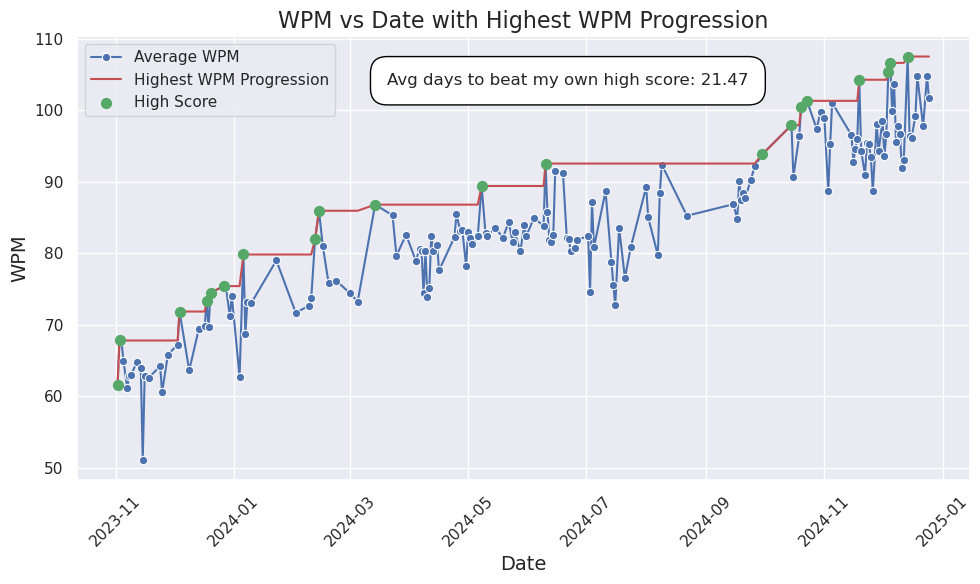

In [254]:
data['date'] = pd.to_datetime(data['date'])

daily_avg_wpm = data.groupby('date')['wpm'].mean().reset_index()

highest_wpm_so_far = []
current_high = -float('inf') 

for wpm in daily_avg_wpm['wpm']:
    if wpm > current_high:
        current_high = wpm
    highest_wpm_so_far.append(current_high)

daily_avg_wpm['highest_wpm_so_far'] = highest_wpm_so_far

matching_points = daily_avg_wpm[daily_avg_wpm['wpm'] == daily_avg_wpm['highest_wpm_so_far']]

matching_points = daily_avg_wpm[daily_avg_wpm['wpm'] == daily_avg_wpm['highest_wpm_so_far']].copy()

matching_points['days_to_beat'] = matching_points['date'].diff().dt.days

average_days_to_beat = matching_points['days_to_beat'].mean()

# Plotting the WPM vs Date graph
plt.figure(figsize=(10, 6))

sns.lineplot(x=daily_avg_wpm['date'], y=daily_avg_wpm['wpm'], marker='o', color='b', label='Average WPM')

sns.lineplot(x=daily_avg_wpm['date'], y=daily_avg_wpm['highest_wpm_so_far'], color='r', linestyle='-', label='Highest WPM Progression')

plt.scatter(matching_points['date'], matching_points['wpm'], color='g', s=50, zorder=5, label='High Score')

plt.title("WPM vs Date with Highest WPM Progression", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("WPM", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

plt.text(
    0.55, 0.9, f"Avg days to beat my own high score: {average_days_to_beat:.2f}", 
    ha='center', va='center', transform=plt.gca().transAxes,
    fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1')
)

plt.legend()
plt.tight_layout()
plt.show()

### Accuracy vs WPM

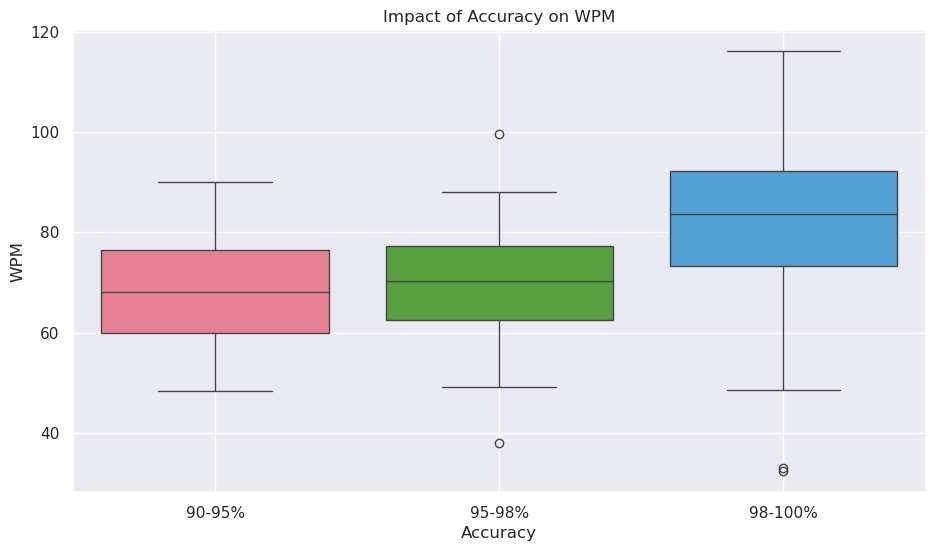

In [255]:
data['acc_group'] = pd.cut(data['acc'], bins=[90, 95, 98, 100], labels=['90-95%', '95-98%', '98-100%'])

plt.figure(figsize=(11, 6))
sns.set(style='darkgrid')
sns.boxplot(data=data, x='acc_group', y='wpm', palette='husl', dodge=False,hue='acc_group', legend=False)
plt.title('Impact of Accuracy on WPM')
plt.xlabel('Accuracy')
plt.ylabel('WPM')
plt.grid(True)
plt.show()

### Consistency vs. WPM

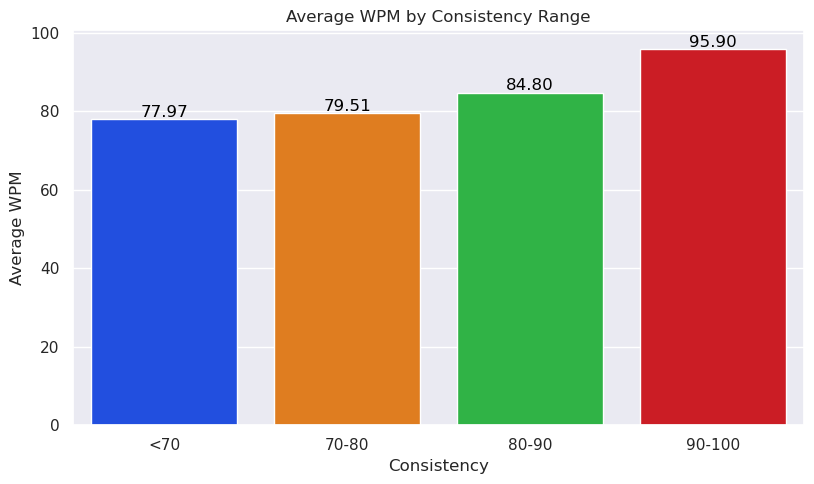

In [256]:
consistency_bins = [0, 70, 80, 90, 100]
consistency_labels = ['<70', '70-80', '80-90', '90-100']
data['consistency_range'] = pd.cut(data['consistency'], bins=consistency_bins, labels=consistency_labels)

consistency_wpm = data.groupby('consistency_range',observed=False)['wpm'].mean()

# Plot the bar graph
plt.figure(figsize=(8.3, 5))
sns.set(style='darkgrid')
ax = sns.barplot(x=consistency_wpm.index, y=consistency_wpm.values, palette="bright",hue=consistency_wpm.index,dodge=
                 False,legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title("Average WPM by Consistency Range")
plt.xlabel("Consistency")
plt.ylabel("Average WPM")

plt.tight_layout()
plt.show()

### WPM vs Test Duration

In [257]:
data.head()

,wpm,acc,rawWpm,consistency,charStats,mode,mode2,testDuration,incompleteTestSeconds,difficulty,datetime,date,month,year,acc_group,consistency_range
0,99.62,100.0,99.62,70.46,52,words,10,6.26,18.34,master,2024-12-25 11:59:48,2024-12-25,2024-12,2024,98-100%,70-80
1,106.81,100.0,106.81,85.66,51,words,10,5.73,5.07,master,2024-12-25 11:53:44,2024-12-25,2024-12,2024,98-100%,80-90
2,102.95,100.0,102.95,81.04,57,words,10,6.64,11.69,master,2024-12-25 11:52:59,2024-12-25,2024-12,2024,98-100%,80-90
3,96.65,100.0,96.65,89.70,46,words,10,5.71,21.16,master,2024-12-25 11:48:06,2024-12-25,2024-12,2024,98-100%,80-90
4,102.25,100.0,102.25,93.96,51,words,10,5.99,63.44,master,2024-12-25 11:47:05,2024-12-25,2024-12,2024,98-100%,90-100


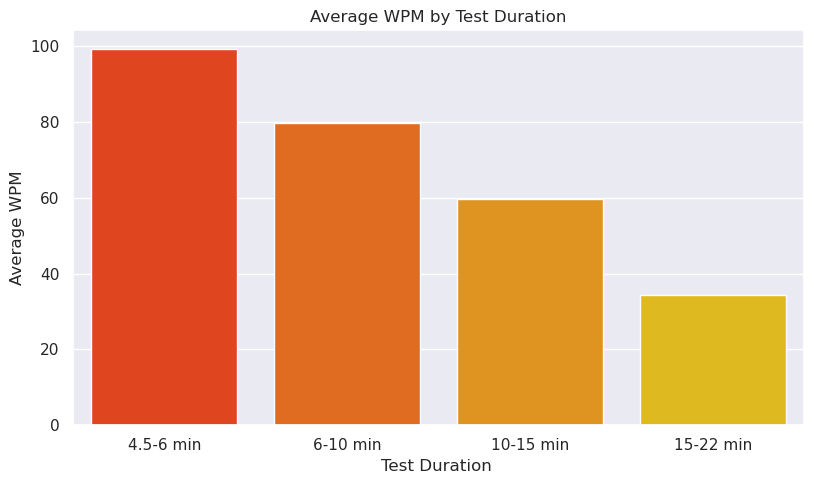

,test_duration_range,wpm
0,4.5-6 min,99.239323
1,6-10 min,79.808308
2,10-15 min,59.671159
3,15-22 min,34.456667


In [258]:
bins = [4.5, 6, 10, 15, 22]  
labels = ['4.5-6 min', '6-10 min', '10-15 min', '15-22 min']  

data['test_duration_range'] = pd.cut(data['testDuration'], bins=bins, labels=labels, include_lowest=True)

range_wpm = data.groupby('test_duration_range',observed=False)['wpm'].mean().reset_index()

# Plot the relationship between test duration ranges and average WPM
plt.figure(figsize=(8.3, 5))
sns.set(style='darkgrid')
sns.barplot(data=range_wpm, x='test_duration_range', y='wpm', palette="autumn",hue='test_duration_range',dodge=False,legend=False)
plt.title("Average WPM by Test Duration")
plt.xlabel("Test Duration ")
plt.ylabel("Average WPM")
plt.tight_layout()
plt.show()

range_wpm


### WPM Increase in 2024 on each month

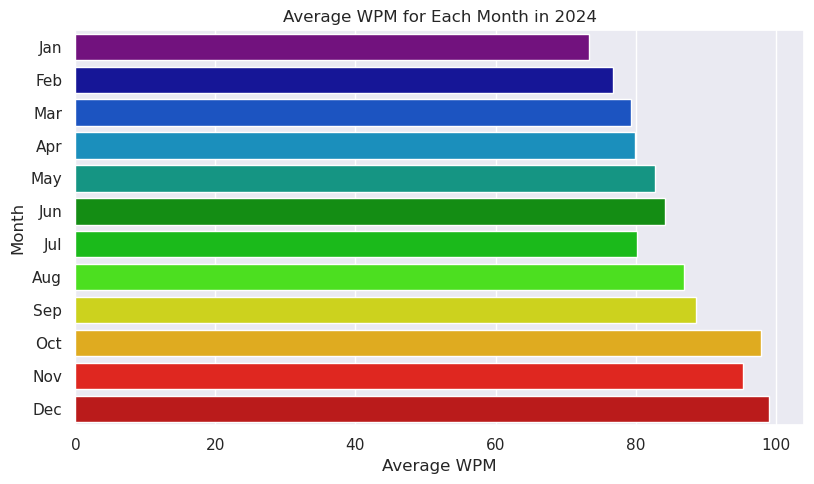

      month        wpm
0   2024-01  73.395484
1   2024-02  76.744524
2   2024-03  79.342941
3   2024-04  79.895862
4   2024-05  82.764865
5   2024-06  84.248088
6   2024-07  80.133091
7   2024-08  86.940385
8   2024-09  88.642453
9   2024-10  97.846400
10  2024-11  95.402048
11  2024-12  99.089706


In [259]:
data_2024 = data[data['year'] == 2024]

monthly_avg_wpm = data_2024.groupby('month')['wpm'].mean().reset_index()

# Plot the average WPM for each month (months on the y-axis and WPM on the x-axis)
plt.figure(figsize=(8.3, 5))
sns.barplot(y=monthly_avg_wpm['month'], x=monthly_avg_wpm['wpm'], palette="nipy_spectral",hue=monthly_avg_wpm['month'],dodge=False,legend=False)

plt.title("Average WPM for Each Month in 2024")
plt.ylabel("Month")
plt.xlabel("Average WPM")

plt.yticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.tight_layout()
plt.show()

print(monthly_avg_wpm.sort_values(by='month', ascending=True))

### Average WPM on each character count 

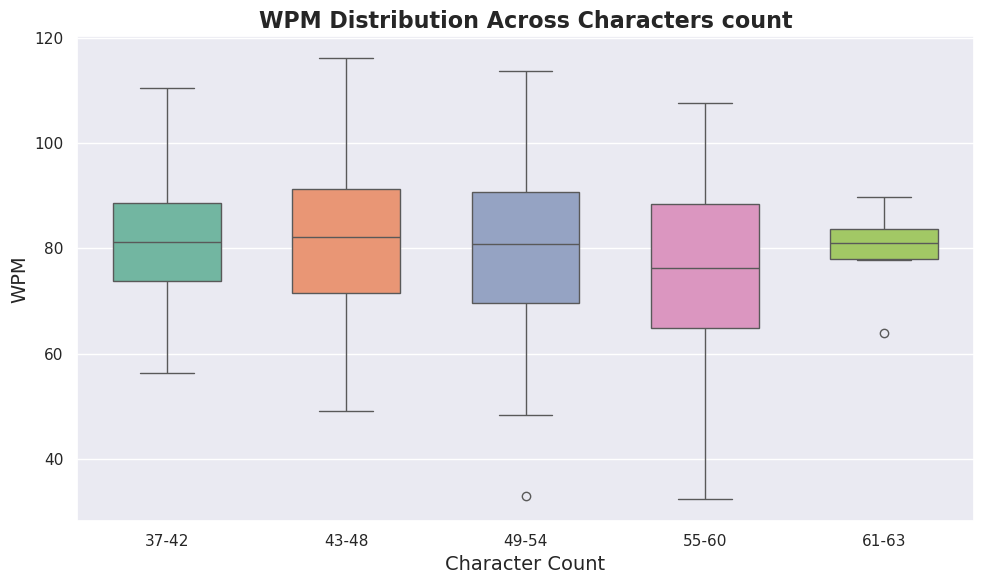

In [260]:
data['charStats'] = pd.to_numeric(data['charStats'], errors='coerce')

data = data.dropna(subset=['charStats'])

charstats_bins = [37, 43, 49, 55, 61, 63]
charstats_labels = ['37-42', '43-48', '49-54', '55-60', '61-63']

data['charstats_range'] = pd.cut(data['charStats'], bins=charstats_bins, labels=charstats_labels, right=True)

sns.set(style="darkgrid")

palette = sns.color_palette("Set2", len(charstats_labels))

# Plot the WPM for each charstats range using a box plot
plt.figure(figsize=(10, 6))

sns.boxplot(
    x='charstats_range', 
    y='wpm', 
    data=data, 
    palette=palette, 
    width=0.6,
    hue='charstats_range',
    dodge=False,
    legend=False
)

plt.xlabel('Character Count', fontsize=14)
plt.ylabel('WPM', fontsize=14)
plt.title('WPM Distribution Across Characters count', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### Count of each wpm (60,70,80,90,100)

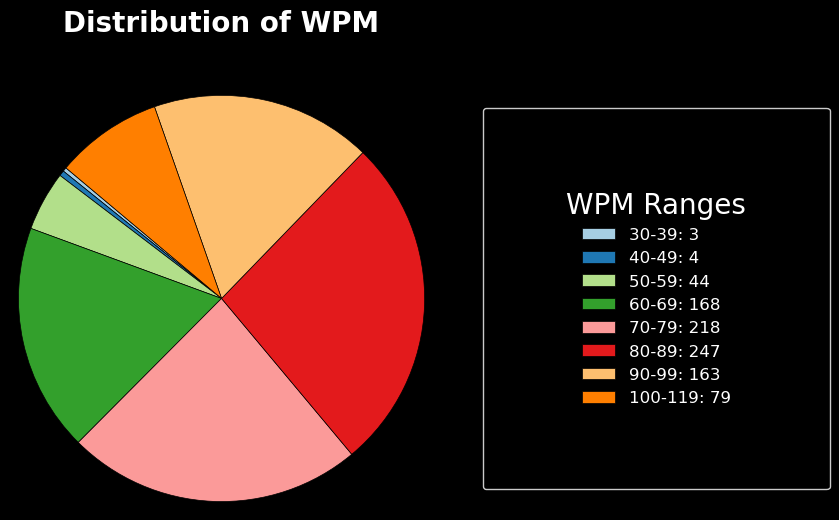

In [261]:
plt.style.use('dark_background')

# Set a larger figure size for better visualization
plt.figure(figsize=(8.3, 8))  # Increased height to provide more space at the top
colors = plt.cm.Paired(range(len(range_counts)))

# Plot the pie chart with an increased radius
wedges, texts = plt.pie(
    range_counts,
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    radius=1.2 # Keep the larger radius
)

# Adjust the legend box to make it larger
plt.legend(
    labels=[f"{label}: {count}" for label, count in zip(range_counts.index, range_counts)],
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # Keep the legend position
    title="WPM Ranges",
    fontsize=12,  # Larger font for the legend labels
    facecolor='black',
    edgecolor='white',
    title_fontsize=20,  # Larger font for the legend title
    labelcolor='white',
    borderaxespad=3,  # Add padding inside the legend box
    borderpad=5  # Increase padding around the legend box
)

# Add padding to the title to create a gap and move it to the top
plt.title('Distribution of WPM', fontsize=20, fontweight='bold', color='white', pad=40)  # Larger padding for space

# Adjust layout to prevent overlapping
plt.subplots_adjust(top=0.85)

plt.tight_layout()
plt.show()

### Average wpm of last 10 test 

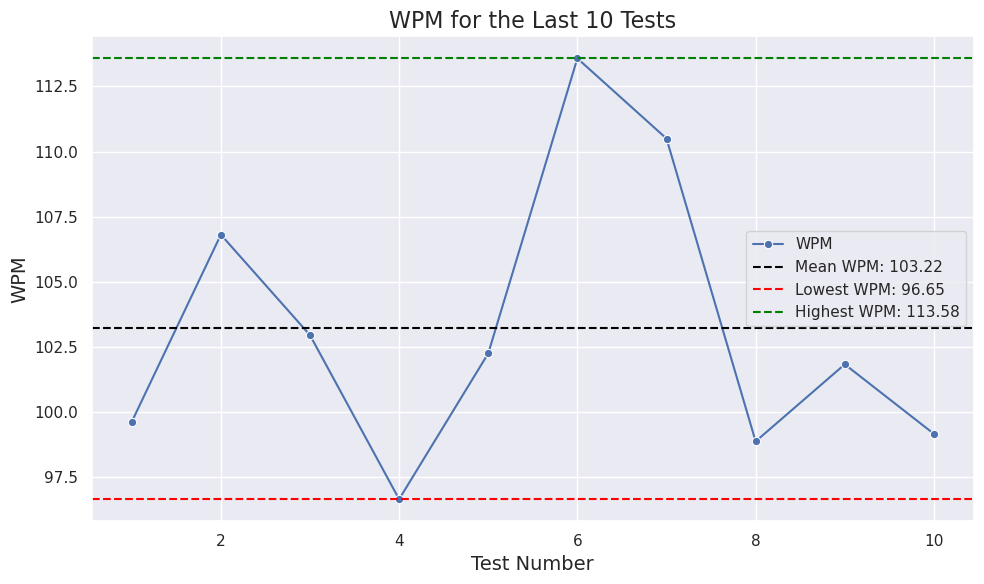

In [ ]:
sns.set_theme(style="darkgrid")

last_10_tests = data.head(10)
test_count = range(1, 11)

mean_wpm = last_10_tests['wpm'].mean()
lowest_wpm = last_10_tests['wpm'].min()
highest_wpm = last_10_tests['wpm'].max()

# Create the plot
plt.figure(figsize=(10, 6))

sns.lineplot(x=test_count, y=last_10_tests['wpm'], marker='o', color='b', label='WPM')

plt.axhline(mean_wpm, color='black', linestyle='--', label=f'Mean WPM: {mean_wpm:.2f}')
plt.axhline(lowest_wpm, color='red', linestyle='--', label=f'Lowest WPM: {lowest_wpm:.2f}')
plt.axhline(highest_wpm, color='green', linestyle='--', label=f'Highest WPM: {highest_wpm:.2f}')

plt.title("WPM for the Last 10 Tests", fontsize=16)
plt.xlabel("Test Number", fontsize=14)
plt.ylabel("WPM", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Overall Averages (WPM, Acc, rawWPM, Consistency)

In [ ]:
# Calculate overall averages for WPM, Accuracy, rawWPM, and Consistency
overall_averages = df[['wpm', 'acc', 'rawWpm', 'consistency']].mean()

print("Overall Averages:")
print(f"WPM: {overall_averages['wpm']:.2f}")
print(f"Accuracy: {overall_averages['acc']:.2f}%")
print(f"Raw WPM: {overall_averages['rawWpm']:.2f}")
print(f"Consistency: {overall_averages['consistency']:.2f}%")
print(f'Higest WPM: {df["wpm"].max()}')

Overall Averages:
WPM: 81.18
Accuracy: 99.27%
Raw WPM: 81.83
Consistency: 74.86%
Higest WPM: 116.07
